|--- petal_width <= 0.80
|   |--- class: 0
|--- petal_width >  0.80
|   |--- petal_width <= 1.75
|   |   |--- petal_length <= 4.95
|   |   |   |--- petal_width <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal_width >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal_length >  4.95
|   |   |   |--- petal_width <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal_width >  1.55
|   |   |   |   |--- petal_length <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal_length >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal_width >  1.75
|   |   |--- petal_length <= 4.85
|   |   |   |--- sepal_width <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal_width >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal_length >  4.85
|   |   |   |--- class: 2

Confusion matrix of DTC is 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]] 

Accuracy score of DTC is 100.0 %



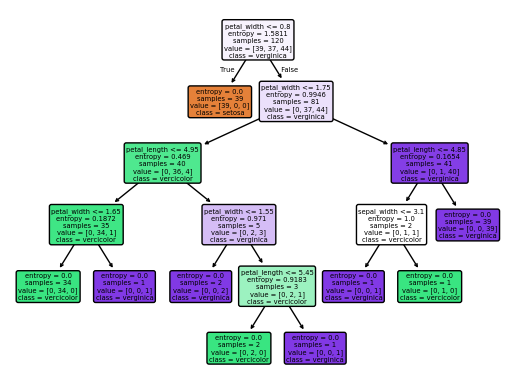

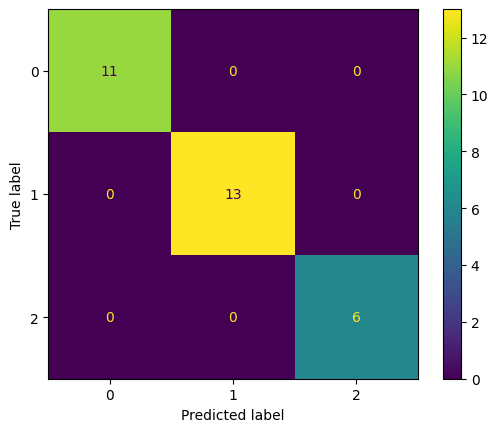

In [3]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

irisset = datasets.load_iris()

#The Iris dataset was used in R.A. Fisher's classic 1936 paper,
#The Use of Multiple Measurements in Taxonomic Problems,
#and can also be found on the UCI Machine Learning Repository.

# It includes three iris species with 50 samples each as well as
#some properties about each flower.
# The 3 species of iris are
#Iris setosa, Iris virginica and Iris versicolor

#The columns in this dataset are:
#Id
#SepalLengthCm
#SepalWidthCm
#PetalLengthCm
#PetalWidthCm
#Species

x = irisset.data
y = irisset.target

Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

cf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
cf.fit(Xtrain, Ytrain)

Ypred = cf.predict(Xtest)

decPlot = plot_tree(decision_tree=cf, feature_names = ["sepal_length","sepal_width","petal_length","petal_width"],
class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)

text_representation = tree.export_text(cf,  feature_names = ["sepal_length","sepal_width","petal_length","petal_width"])
print(text_representation)

cmat = confusion_matrix(Ytest, Ypred)
print('Confusion matrix of DTC is \n',cmat,'\n')

disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()

DTCscore = accuracy_score(Ypred,Ytest)
print('Accuracy score of DTC is',100*DTCscore,'%\n')